In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

plt.rcParams["figure.dpi"] = 600

In [2]:
def read1_avg(filename):
    sortList = ["RTS"]
    latencyList = ['Initialization latency', 'Construction latency', 'Traversal latency']
    total = []
    for latency in latencyList:
        res = []
        f = open(filename)
        line = f.readline()
        while line: 
            if latency in line:
                line = line.strip(latency + ": ")
                line = line.strip(" (ms)\n")
                res.append(float(line))
            line = f.readline() 
        f.close() 
        res = list(map(lambda x: round(x/1000, 3), res))
        n = []
        for i in range(0, len(res), 10):
            n.append(round(sum(res[i+3:i+7])/4, 3)) 
        total.append(n)
    return total

def read2_avg(filename):
    sortList = ["Elements"]
    latencyList = ['Total RUN', 'Total MERGE']
    total = []
    for latency in latencyList:
        res = []
        f = open(filename)
        line = f.readline()
        while line: 
            if latency in line:
                line = line.strip(latency + ": ")
                line = line.strip(" (ms)\n")
                res.append(float(line))
            line = f.readline() 
        f.close() 
        res = list(map(lambda x: round(x, 3), res))
        n = []
        for i in range(0, len(res), 10):
            n.append(round(sum(res[i+3:i+7])/4, 3))  
        total.append(n)
    return total

def read3_avg(filename):
    sortList = ["IPS4o", "Quick", "External", "B*"]
    latencyList = ['Sorting latency', 'Reading latency']
    total = []
    for latency in latencyList:
        res = []
        next = False
        f = open(filename)
        line = f.readline()
        while line: 
            if latency in line:
                line = line.strip(latency + ": ")
                line = line.strip(" (ms)\n")
                res.append(float(line))
            line = f.readline() 
        f.close()
        res = list(map(lambda x: round(x/1000, 3), res))
        n = []
        for i in range(0, len(res), 10):
            n.append(round(sum(res[i+3:i+7])/4, 3))  
        total.append(n)
    return total

In [3]:
# get total latency stats (avg, min, max)

def read1(filename):
    sortList = ["RTS"]
    latencyList = ['Initialization latency', 'Construction latency', 'Traversal latency']
    total = []
    for latency in latencyList:
        res = []
        f = open(filename)
        line = f.readline()
        while line: 
            if latency in line:
                line = line.strip(latency + ": ")
                line = line.strip(" (ms)\n")
                res.append(float(line))
            line = f.readline() 
        f.close() 
        res = list(map(lambda x: round(x/1000, 3), res))
        total.append(res)
    return total

def read2(filename):
    sortList = ["Elements"]
    latencyList = ['Total RUN', 'Total MERGE']
    total = []
    for latency in latencyList:
        res = []
        f = open(filename)
        line = f.readline()
        while line: 
            if latency in line:
                line = line.strip(latency + ": ")
                line = line.strip(" (ms)\n")
                res.append(float(line))
            line = f.readline() 
        f.close() 
        res = list(map(lambda x: round(x, 3), res))
        total.append(res)
    return total

def read3(filename):
    sortList = ["IPS4o", "Intro", "External", "B*"]
    latencyList = ['Sorting latency', 'Reading latency']
    total = []
    for latency in latencyList:
        res = []
        f = open(filename)
        line = f.readline()
        while line: 
            if latency in line:
                line = line.strip(latency + ": ")
                line = line.strip(" (ms)\n")
                res.append(float(line))
            line = f.readline() 
        f.close()
        res = list(map(lambda x: round(x/1000, 3), res))
        total.append(res)
    return total


def read1_stats(filename):
    out = []
    total = []
    [l1, l2, l3] = read1(filename)
    for k in range(len(l1)):
        total.append(round(l1[k] + l2[k] + l3[k], 3))
    for k in range(0, len(total), 10):
        avgV = round(sum(total[k+3:k+7])/4, 3)
        minV = round(min(total[k+3:k+7]), 3)
        maxV = round(max(total[k+3:k+7]), 3)
        out.append((avgV, minV, maxV))
    return out

def read2_stats(filename):
    out = []
    total = []
    [l1, l2] = read2(filename)
    for k in range(len(l1)):
        total.append(round(l1[k] + l2[k], 3))
    for k in range(0, len(total), 10):
        avgV = round(sum(total[k+3:k+7])/4, 3)
        minV = round(min(total[k+3:k+7]), 3)
        maxV = round(max(total[k+3:k+7]), 3)
        out.append((avgV, minV, maxV))
    return out

def read3_stats(filename):
    out = []
    total = []
    [l1, l2] = read3(filename)
    for k in range(len(l1)):
        total.append(round(l1[k] + l2[k], 3))
    for k in range(0, len(total), 10):
        avgV = round(sum(total[k+3:k+7])/4, 3)
        minV = round(min(total[k+3:k+7]), 3)
        maxV = round(max(total[k+3:k+7]), 3)
        out.append((avgV, minV, maxV))
    return out

In [5]:
def runall(fileList):

    error_params=dict(elinewidth=0.5,ecolor='grey',capsize=3)
    mpl.rcParams['hatch.linewidth'] = 0.3

    colorList = ['#d53e4f', '#fc8d59', '#fee08b', '#ffff99', '#d9ef8b', '#99d594', '#3288bd']
    labelList = ['selection', 'Introsort', 'IPS\u2074o', 'external', 'WiscSort', 'B*', 'TSort']
    hatchList = ['', '///', '|||', '', '//\\\\', '--', '\\\\\\']
    hatchLegendList = ['', '////////', '||||||||', '', '////\\\\\\\\', '------', '\\\\\\\\\\\\\\\\']
    
    width = 0.8
    ylim = 12

    x = [0, 1, 2, 4, 5, 7, 8]
    xlabel = [1, 4.5, 7.5]
    xname = ['in-place', 'external', 'tree']

    l = [[], [], []]    # uni, skew 2, skew 50
    error_upper = [[], [], []]
    error_lower = [[], [], []]
    for i in range(len(fileList)):
        if i == 0 or i == 5:
            temp = [[7200 for _ in range(3)] for _a in range(2)]
            temp_error = [[7200 for _ in range(3)] for _a in range(3)]
        elif i == 6:
            temp = read1_avg(fileList[i])
            temp_error = read1_stats(fileList[i])
        elif i == 4:
            temp = read2_avg(fileList[i])
            temp_error = read2_stats(fileList[i])
        else:
            temp = read3_avg(fileList[i])
            temp_error = read3_stats(fileList[i])
        for k in range(len(l)):
            l[k].append(sum([temp[j][k] for j in range(len(temp))]))
            error_upper[k].append(temp_error[k][2]-temp_error[k][0])
            error_lower[k].append(temp_error[k][0]-temp_error[k][1])

    for fidx in range(len(l)+1):
        if fidx == len(l): 
            plt.figure(figsize=(5, 1.2))
            for i in range(len(fileList)):
                plt.bar(x[i], 0, color=colorList[i], edgecolor='black', linewidth=0.25, hatch=hatchLegendList[i], label=labelList[i])
            plt.legend(ncol=7, bbox_to_anchor=(1.1, -0.35), handlelength=0.7, handletextpad=0.4, columnspacing=1.3, fontsize=8)
            plt.xticks([])
        else: 
            plt.figure(figsize=(3, 1.2))
            for i in range(len(fileList)):
                plt.bar(x[i], l[fidx][i], width=width, color=colorList[i], edgecolor='black', linewidth=0.25, hatch=hatchList[i], yerr=[[error_lower[fidx][i]], [error_upper[fidx][i]]], error_kw=error_params)
                if l[fidx][i] > 100:
                    plt.text(x[i]-0.42, ylim*0.85, '>2h', color='black', size=7)
                elif l[fidx][i] > ylim:
                    plt.text(x[i]-0.42, ylim*0.85, round(l[fidx][i], 2), color='black', size=7)
            plt.axvline(x=3, color='lightblue', linestyle='--', linewidth=0.8, alpha=0.7)
            plt.axvline(x=6, color='lightblue', linestyle='--', linewidth=0.8, alpha=0.7)
            plt.xticks([])
            plt.xticks(xlabel, xname, size=8)
            plt.yticks(range(0, ylim+1, 3), size=8)
            plt.ylim(0, ylim)
            plt.ylabel('Latency (s)', size=8)
            plt.grid(linestyle='--', axis='y', alpha=0.3)
        plt.tight_layout()
        # plt.savefig('fig/pre_'+str(fidx)+'.pdf', format='pdf')
    
    plt.show()

In [6]:
folder = '20231025_pre'
datasize = '40m'
date = '20231025'

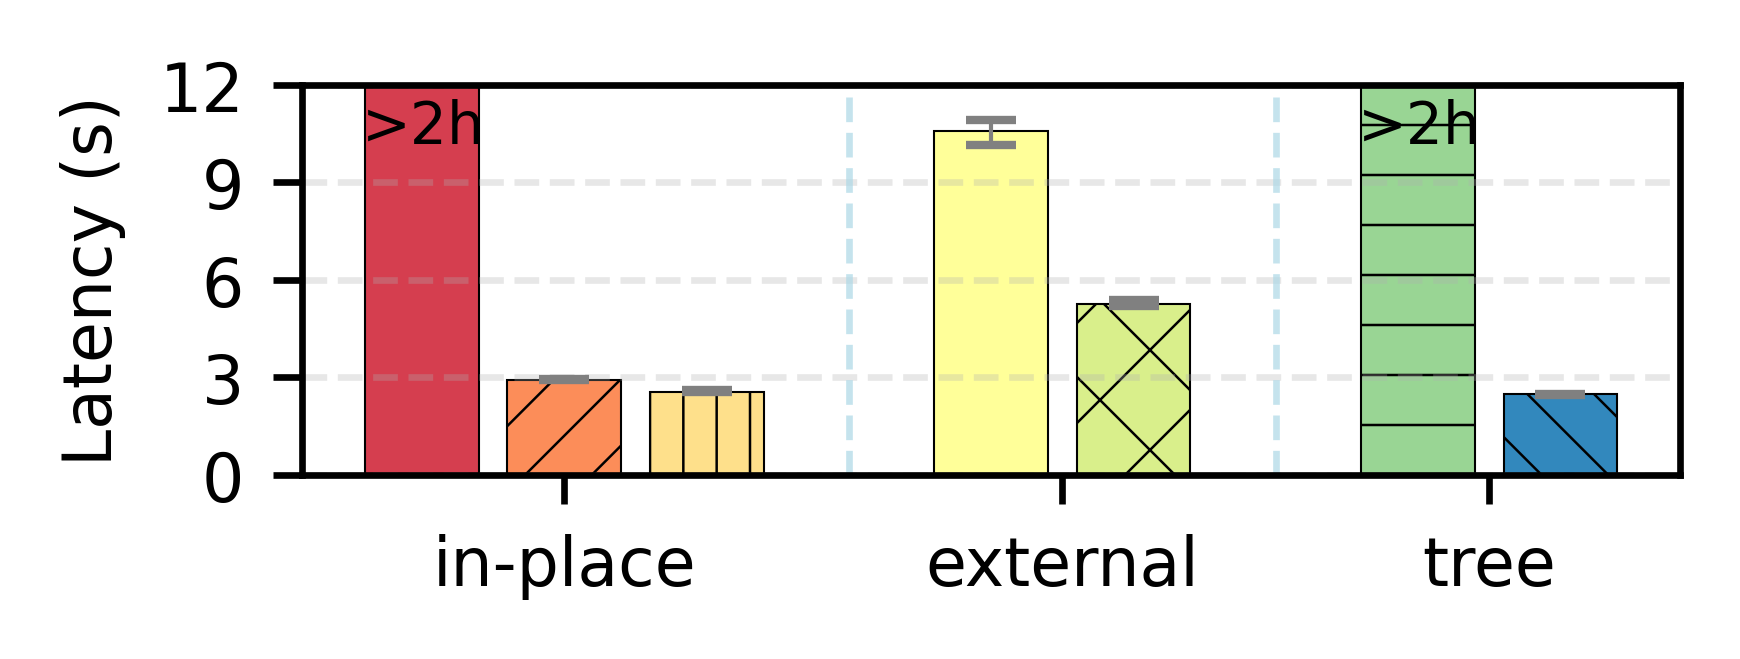

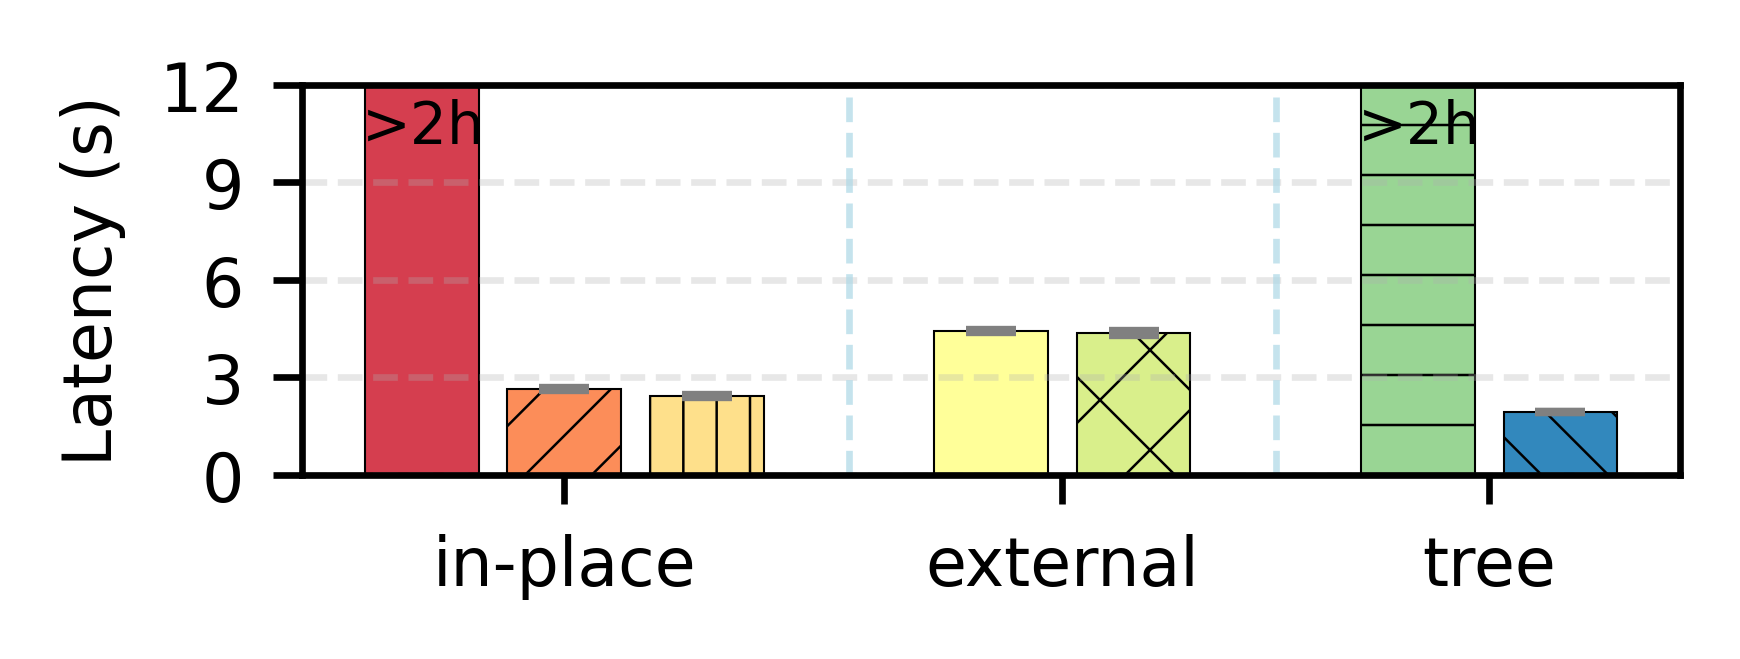

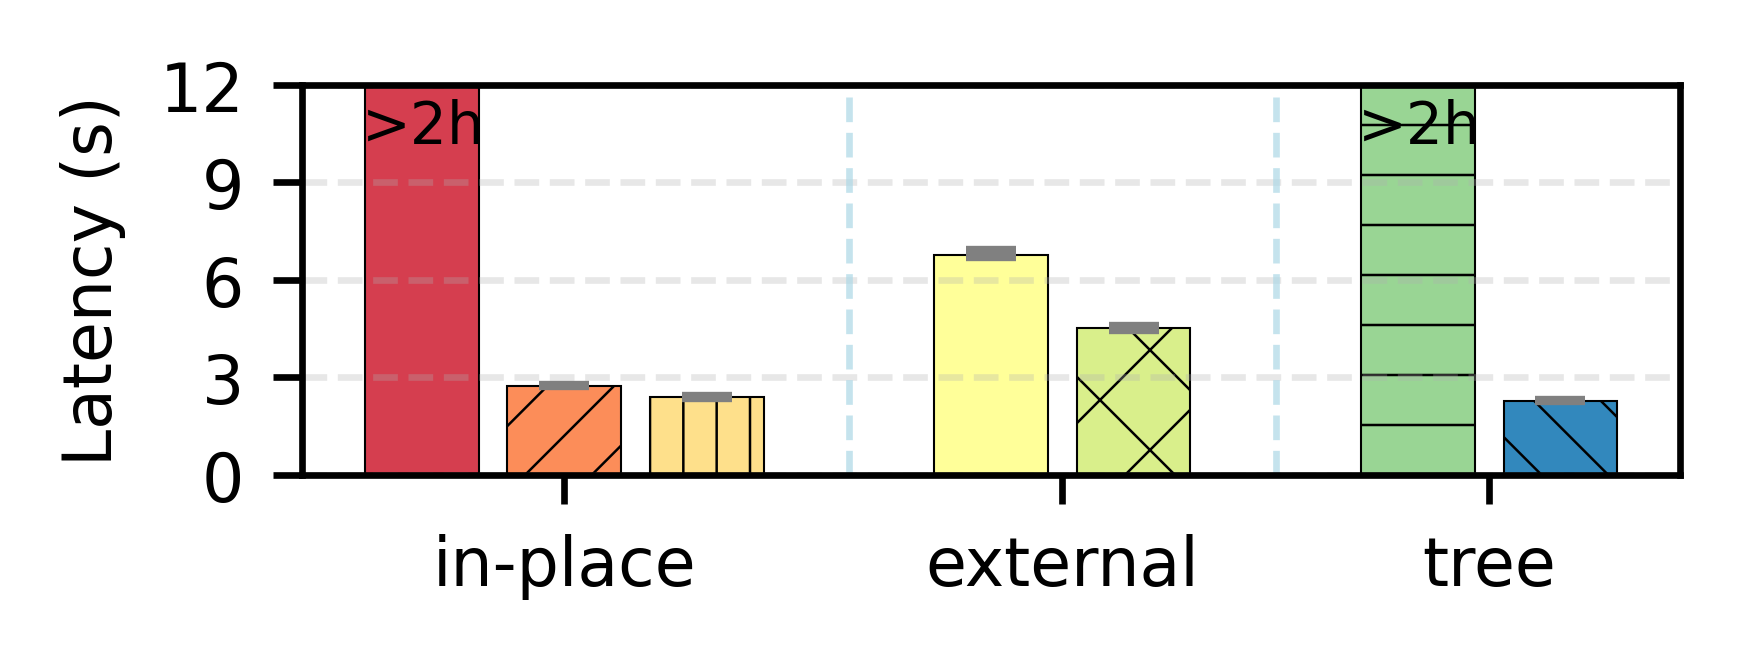

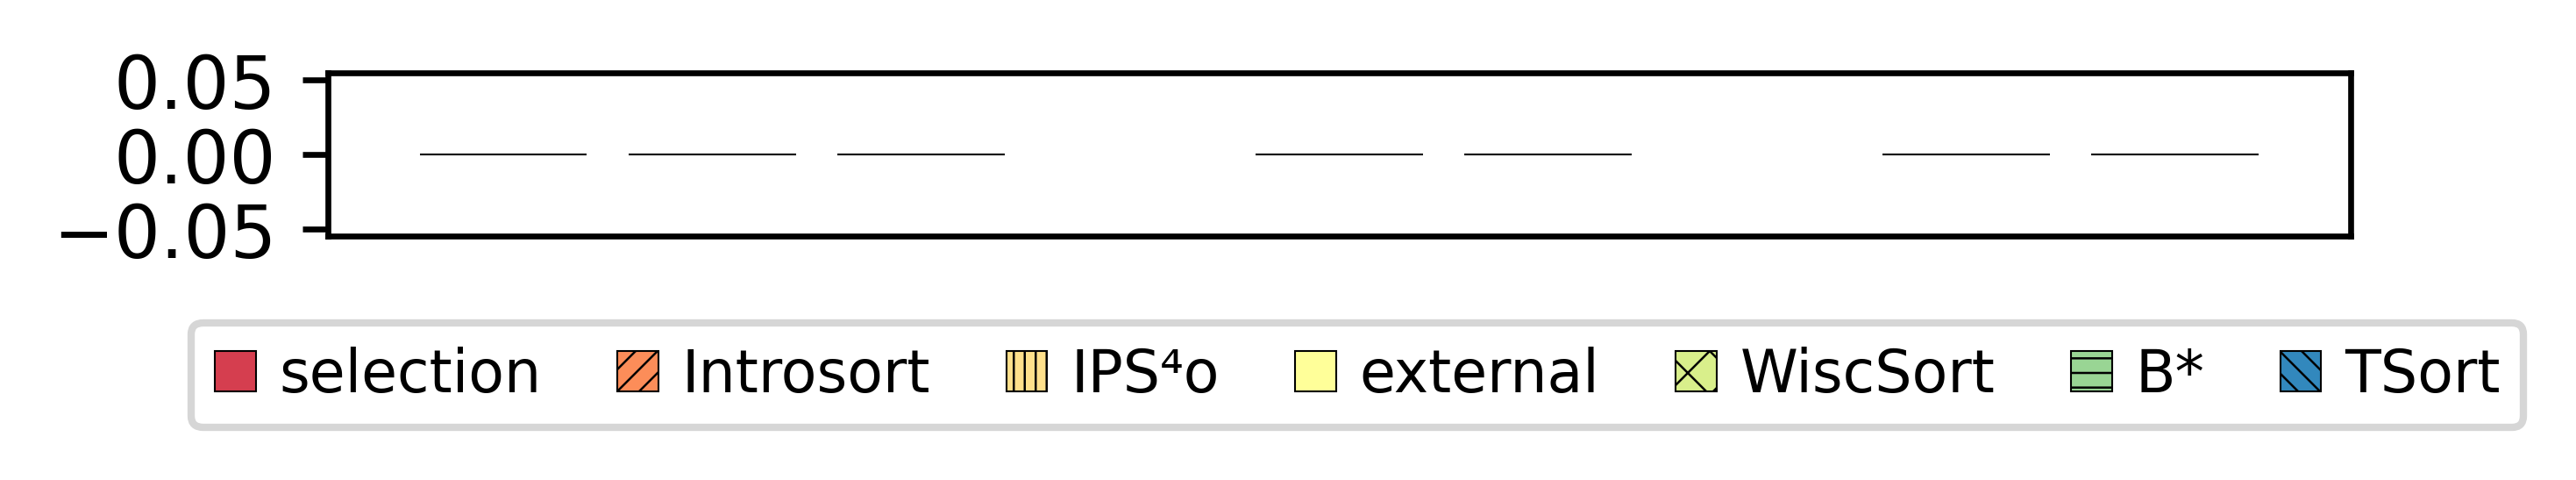

In [7]:
file = [folder+'/'+datasize+"_selection_"+date+".out",
    folder+'/'+datasize+"_intro_"+date+".out",
    folder+'/'+datasize+"_ips4o_"+date+".out",
    folder+'/'+datasize+"_external_"+date+".out",
    folder+'/'+datasize+"_wisc_r3w1_"+date+".out",
    folder+'/'+datasize+"_bstar_"+date+".out",
    folder+'/'+datasize+"_et_v7_"+date+".out"]

runall(file)